In [1]:
import sys
import os
sys.path.insert(1, os.path.join(os.path.expanduser('~/.local/lib/python2.7/site-packages/')))
import matplotlib
print(matplotlib.__version__)


print(matplotlib.__version__)


import glob, os
import pandas as pd
import csv
import dateutil.parser
get_ipython().magic(u'matplotlib inline')
import matplotlib
import datetime
import calendar
import calendar
import numpy as np
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

1.4.0
1.4.0


In [2]:
# Part 1

data_path = "data/"
allFiles = [file for file in glob.glob(data_path+"*.txt")]

df_list=[pd.read_csv(f) for f in allFiles]
traffic=pd.concat(df_list)

traffic.head()

traffic.rename(columns=lambda x: x.strip(),inplace=True)





In [3]:
traffic['date_time'] = pd.to_datetime(traffic.DATE + ' ' + traffic.TIME)
traffic['date_parsed'] = pd.to_datetime(traffic.DATE)

In [4]:
traffic.sort(['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','date_time'],inplace =True)


traffic['key']= tuple(zip(traffic['C/A'],traffic['UNIT'],traffic['SCP'],traffic['STATION']))


traffic['shifted_entries']=traffic['ENTRIES'].shift(periods=1) 
traffic['shifted_exits']=traffic['EXITS'].shift(periods=1) 
traffic['shifted_key']=traffic['key'].shift(periods=1) 


traffic['ENTRIESn_hourly'] = np.where(traffic['shifted_key']==traffic['key'],traffic['ENTRIES']-traffic['shifted_entries'],0)
traffic['EXITSn_hourly'] = np.where(traffic['shifted_key']==traffic['key'],traffic['EXITS']-traffic['shifted_exits'],0)

min_bad_value=0
max_bad_value=5000

bad_values=traffic[(traffic.ENTRIESn_hourly<min_bad_value) | (traffic.ENTRIESn_hourly>max_bad_value)]
good_values=traffic[(traffic.ENTRIESn_hourly>=min_bad_value) & (traffic.ENTRIESn_hourly<=max_bad_value)]

traffic.drop(['shifted_entries','shifted_exits','shifted_key'],inplace=True,axis=1)
traffic=good_values

earliest_may_date=datetime.date(2015,5,1)
latest_may_date=datetime.date(2015,5,30)
may_df=traffic[(traffic.date_parsed >= earliest_may_date) & (traffic.date_parsed <= latest_may_date)]




In [113]:

total_entries = traffic.groupby(['STATION', 'UNIT'], as_index=False).sum()
total_entries=total_entries.reset_index()



total_entries

,index,STATION,UNIT,ENTRIES,EXITS,shifted_entries,shifted_exits,ENTRIESn_hourly,EXITSn_hourly
0,0,1 AVE,R248,100707946629,103853564135,1.016458e+11,1.048439e+11,605504,630596
1,1,103 ST,R180,7655926260,8851975478,7.665213e+09,8.830369e+09,328913,381766
2,2,103 ST,R191,12830036745,6613045442,1.282153e+10,6.604838e+09,410445,190973
3,3,103 ST,R314,5031373781,4545821450,5.031728e+09,4.546871e+09,155875,113023
4,4,103 ST-CORONA,R208,13954938857,12701497389,1.395223e+10,1.269631e+10,644568,513418
5,5,104 ST,R007,4254195056,2738311236,4.250869e+09,2.734039e+09,72883,49232
6,6,110 ST,R181,6532334448,5980058317,6.528289e+09,5.999947e+09,439688,330337
7,7,110 ST-CATHEDRL,R192,8587182156,3260867933,8.586827e+09,3.260336e+09,429005,217985
8,8,110 ST-CPN,R323,80404217995,75478631962,8.109450e+10,7.622987e+10,332971,275352
9,9,111 ST,R008,3039353452,2852578832,3.037591e+09,2.852429e+09,84991,49749


In [185]:
# Part 2

data_path = "data_commuter/"
allFiles = [file for file in glob.glob(data_path+"*.csv")]
df_list=[pd.read_csv(f, header = 2) for f in allFiles]
df=pd.concat(df_list)
df.rename(columns=lambda x: x.strip(),inplace=True)

df['30_TOT'] = df['30-D AFAS/RMF UNL'] + df['30-D UNL']
df = df.rename(columns={'REMOTE': 'UNIT'})
df = df[['UNIT', 'STATION','30_TOT', 'FF']]


df.sort(['STATION'], inplace=True)
gb = df.groupby(['STATION', 'UNIT'], as_index = False).sum()
gb['RATIO'] = gb['30_TOT'] / gb['FF']


In [186]:
# Make graphs

results = pd.merge(gb, total_entries, on =['UNIT'])
results = results[['STATION_y', 'UNIT', 'RATIO', 'ENTRIESn_hourly']]
grouped = results.groupby('STATION_y', as_index = False)
results = grouped.agg({'RATIO': 'mean', 
             'ENTRIESn_hourly': 'sum'})

In [187]:
#results['ENTRIESn_houry'] = results.groupby(['STATION_y'], as_index=False).sum()
#results.sort('ENTRIESn_hourly', ascending=False)
results.sort('RATIO', inplace=True)
results = results[21:]


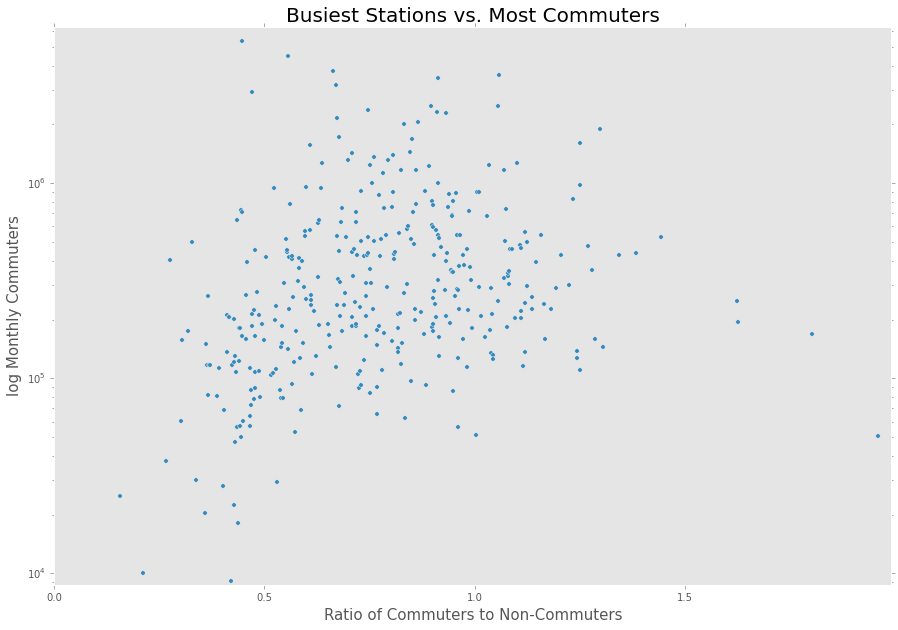

In [181]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

results.plot(kind='scatter', 
             y='ENTRIESn_hourly', x='RATIO', 
             logy=True, ax=ax, 
             xlim=(0,max(results['RATIO']+.03)), 
             ylim =(0,max(results['ENTRIESn_hourly']+1000000)), title = "Busiest Stations vs. Most Commuters")
ax.set_ylabel('log Monthly Commuters', fontsize=15)
ax.set_xlabel('Ratio of Commuters to Non-Commuters', fontsize =15)

ax.grid(False)
a=ax.get_yticks()


ax.set_title(ax.get_title(), fontsize=20)


In [72]:
results[(results.ENTRIESn_hourly > 1500000) & (results.RATIO > 1.0)]

,STATION_x,UNIT,RATIO,ENTRIESn_hourly
353,MAIN STREET,R055,1.298297,1904093
434,ROOSEVELT AVE/JACKSON HTS,R018,1.248797,1603067


In [184]:
results[(results.RATIO > 1.90)]

,STATION_y,ENTRIESn_hourly,RATIO
50,22 AVE-BAY PKY,50623,1.958589
